# Creating An ANN using Pytorch

In [4]:
import torch.nn.functional as nnf

In [5]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [4]:
# Split into train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [7]:
df.shape

(768, 9)

In [8]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [9]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [10]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [11]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [12]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss.item())
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019207119941711
Epoch number: 21 and the loss : 0.609032154083252
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.5679706931114197
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135972499847412
Epoch number: 101 and the loss : 0.5061253905296326
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.4960552155971527
Epoch number: 131 and the loss : 0.4828636348247528
Epoch number: 141 and the loss : 0.4756036698818207
Epoch number: 151 and the loss : 0.47992366552352905
Epoch number: 161 and the loss : 0.4792959690093994
Epoch number: 171 and the loss : 0.4650002121925354
Epoch number: 181 and the loss : 0.45820358395576477
Epoch number: 191 and

Text(0.5, 0, 'Epoch')

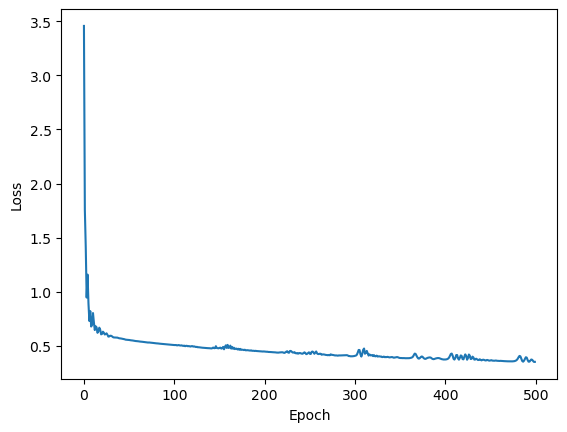

In [13]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [14]:
#### Method to find the probability of 2 classes for y_pred
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        y_probability = torch.sigmoid(y_pred)
        print(y_probability)

tensor([0.8465, 0.9868])
tensor([0.8949, 0.2657])
tensor([0.9549, 0.5150])
tensor([0.5228, 0.7866])
tensor([0.8979, 0.8269])
tensor([0.9765, 0.1642])
tensor([0.2588, 0.8376])
tensor([0.4270, 0.8791])
tensor([0.4046, 0.3991])
tensor([0.7024, 0.2212])
tensor([0.3273, 0.7876])
tensor([0.2258, 0.9123])
tensor([0.9202, 0.7348])
tensor([0.0414, 0.7819])
tensor([0.9461, 0.1139])
tensor([0.9105, 0.5799])
tensor([0.3866, 0.8340])
tensor([0.9285, 0.3674])
tensor([0.8249, 0.8413])
tensor([0.6633, 0.5445])
tensor([0.8088, 0.9356])
tensor([0.9907, 0.5880])
tensor([0.7832, 0.7039])
tensor([0.9967, 0.0071])
tensor([0.9189, 0.1181])
tensor([0.7873, 0.8747])
tensor([0.9519, 0.5320])
tensor([0.1522, 0.8451])
tensor([0.9320, 0.6336])
tensor([0.8894, 0.8218])
tensor([0.6241, 0.6456])
tensor([0.7088, 0.5709])
tensor([0.6879, 0.2779])
tensor([0.3769, 0.6569])
tensor([0.8786, 0.7106])
tensor([0.9622, 0.9928])
tensor([0.4447, 0.6798])
tensor([0.9879, 0.1063])
tensor([0.6039, 0.5212])
tensor([0.7967, 0.9472])


In [15]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)        
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[90, 17],
       [14, 33]])

Text(95.72222222222221, 0.5, 'Predicted Values')

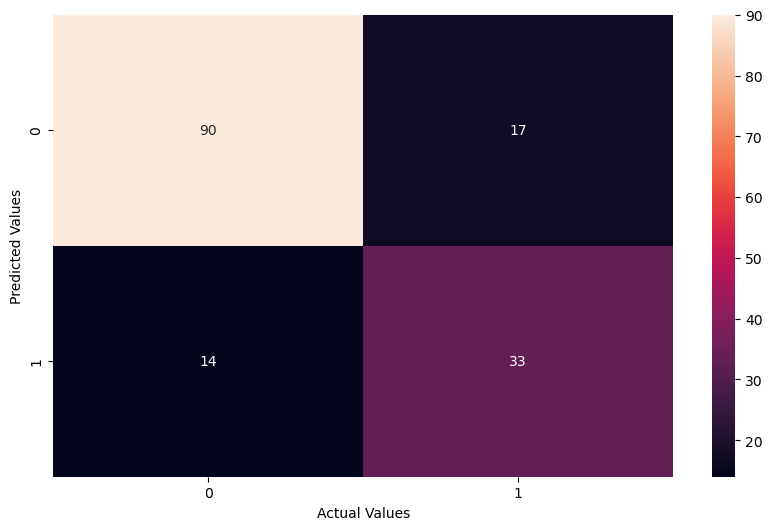

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [18]:
#### Save the model
torch.save(model,'model.pt')

In [19]:
#### Save And Load the model
model=torch.load('model.pt')

In [20]:
### Predcition of new data point
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
new_data=torch.tensor(lst1)

In [21]:
#### Predict new data using Pytorch
with torch.no_grad():
    new_data_output = model(new_data)
    print(new_data_output)
    print(new_data_output.argmax().item())

tensor([1.1163, 1.3008])
1


In [22]:
#### find the probability of 2 classes for y_pred
y_probability = torch.sigmoid(new_data_output)
print(y_probability)

tensor([0.7533, 0.7860])
